In [ ]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [ ]:
file_id = '1affGFPxQ1RmV73Vk7tDNaDSbUWP4YDHP'
destination = 'texas.json'
download_file_from_google_drive(file_id, destination)

In [ ]:
import json
with open('texas.json', 'r') as fp:
    texas = json.load(fp)

In [ ]:
def tokens_to_ids(tokens, is_c):
  if is_c:
    return [c2id[c] for c in tokens]
  else:
    return [m2id[m] for m in tokens]
def ids_to_tokens(ids, is_c):
  if is_c:
    return [id2c(id) for id in ids]
  else:
    return [id2m(id) for id in ids]
comment_vocab = set()
code_vocab = set()
for sample in texas:
  comment_vocab |= set(sample['C1']) | set(sample['C2'])
  code_vocab |= set(sample['M1']) | set(sample['M2'])
print(len(comment_vocab), len(code_vocab))

def id2m(id):
  return list(code_vocab)[id]

m2id = {m: id for id, m in enumerate(code_vocab)}
# c - token in comment, m - token im method
def id2c(id):
  return list(comment_vocab)[id]

c2id = {c: id for id, c in enumerate(comment_vocab)}
def create_dataset(data):
  cX, mX = [], []
  Y = []
  for sample in data:
    C1 = tokens_to_ids(sample['C1'], is_c=True)
    C2 = tokens_to_ids(sample['C2'], is_c=True)
    M1 = tokens_to_ids(sample['M1'], is_c=False)
    M2 = tokens_to_ids(sample['M2'], is_c=False)
    # New code and old comment --> inconsistency 
    cX.append(C1)
    mX.append(M2)
    Y.append(1)
    # New code and new comment --> consistency
    cX.append(C2)
    mX.append(M2)
    Y.append(0)
  return cX, mX, Y

3780 5632


In [ ]:
cX, mX, Y = create_dataset(texas)

In [ ]:
def sample_data(cX, mX, Y, k = 5):
  for _ in range(k):
    id = np.random.randint(0, len(Y))
    C = cX[id]
    M = mX[id]
    C = list(filter(lambda x: x != PAD_c, C))
    C = list(map(lambda x: id2c(x), C))
    M = list(filter(lambda x: x != PAD_m, M))
    M = list(map(lambda x: id2m(x), M))
    print(f"C: {' '.join(C)} \n M: {' '.join(M)} \n {'Inconsistent' if Y[id] else 'Consistent'}")


In [ ]:
import numpy as np
# PAD sequences to max len
PAD_m = len(code_vocab)
PAD_c = len(comment_vocab)
sample_data(cX, mX, Y)

C: a new service object or a already created service object in the case of singleton or null if the instance is no more valid 
 M: public object get service bundle bundle service registration registration if get instance manager get state instance manager valid return m strategy get service bundle registration else return 
 Consistent
C: true if the servlet class represented by this component implements the single thread model interface 
 M: public boolean is single thread model if single thread model instance return boolean value of single thread model return 
 Inconsistent
C: always false 
 M: public boolean is user in role string role principal principal get user principal if principal instanceof mock principal return mock principal principal get roles contains role return 
 Inconsistent
C: the string for the given key 
 M: public final string get string key string result properties get key if result if parent result parent get key if result if exception on missing key throw new mis

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def find_return(strs):
  all = []
  for t in strs:
    if t == 'return':
      all.append(color.BOLD + t + color.END)
    else:
      all.append(t)
  return ' '.join(all)
def insert_newlines(string, every=64):
    lines = []
    for i in range(0, len(string), every):
        lines.append(find_return(string[i:i+every]))
    return '\n'.join(lines)

def colorize(C, M):
  colors = [color.PURPLE, color.CYAN, color.DARKCYAN, color.BLUE, color.GREEN, color.RED]
  vocab = list(set(C))
  color_vocab = {w: colors[i % len(colors)] for i, w in enumerate(vocab)}
  new_C, new_M = [], []
  for c in C:
    new_C.append(color_vocab[c] + c + color.END)
  

  for m in M:
    if m in color_vocab:
      new_M.append(color_vocab[m] + m + color.END)
    else:
      new_M.append(m)
  return new_C, new_M

def clear():
    os.system( 'cls' )
def manual_label(cX, mX, Y, k=100):
  pos = 0
  idk = 0
  for num in range(k):
    print(f"{int(num / k * 100)}%")
    id = np.random.randint(0, len(Y))
    C = cX[id]
    M = mX[id]
    C = list(filter(lambda x: x != PAD_c, C))
    C = list(map(lambda x: id2c(x), C))
    M = list(filter(lambda x: x != PAD_m, M))
    M = list(map(lambda x: id2m(x), M))
    C, M = colorize(C, M)
    C = ' '.join(C)
    M = insert_newlines(M, 15)
    print('Comment: \n', C, sep='')
    print('Code: \n', M, sep='')
    ans = input('y/n?\n')
    if int(ans == 'y') == Y[id]:
      pos += 1
      print('Correct')
    elif ans == '?':
      idk += 1
      print('Answer is ', 'Inconsistent' if Y[id] else 'Consistent')
      C2 = cX[id + 1] if Y[id] else cX[id - 1]
      C2 = list(filter(lambda x: x != PAD_c, C2))
      C2 = list(map(lambda x: id2c(x), C2))
      print(f"{'New' if Y[id] else 'Old'} comment is:\n {' '.join(C2)}")
    else:
      print('Wrong')
      print('Answer is ', 'Inconsistent' if Y[id] else 'Consistent')
      C2 = cX[id + 1] if Y[id] else cX[id - 1]
      C2 = list(filter(lambda x: x != PAD_c, C2))
      C2 = list(map(lambda x: id2c(x), C2))
      print(f"{'New' if Y[id] else 'Old'} comment is:\n {' '.join(C2)}")
    print('\n\n\n')
  print(f'Correct ratio: {pos / (k - idk)} IDK ratio: {idk / k}')

In [ ]:
manual_label(cX, mX, Y, 100)

0%
Comment: 
true if the user is in one of the menu roles
Code: 
public boolean is user in roles for iterator i get roles iterator i has next
string rolename string i next if get context get request is user in role rolename
return for iterator i get children iterator i has next menu child menu i next
if child is user in roles return return
y/n?
n
Wrong
Answer is  Inconsistent
New comment is:
 true if the user is in one of the menu roles or false otherwise




1%
Comment: 
the description to tag an existing schema with when executing baseline default lt lt flyway baseline gt gt
Code: 
deprecated public string get init description log warn str return baseline description
y/n?
y
Wrong
Answer is  Consistent
Old comment is:
 the description to tag an existing schema with when executing init default




2%
Comment: 
the removed entry
Code: 
final ipage map entry remove final ipage map entry entry session remove attribute attribute for
id entry get numeric id size return entry
y/n?
n
Correct


In [ ]:
# 0.58 manual labeling....

In [ ]:
print(colorize(['abc' , 'kek'], ['kek']))

kek
(['abc', 'kek'], ['kek'])


In [ ]:
def predict_rules(cX, mX):
  y_pred = []
  for c, m in zip(cX, mX):
    y_pred.append(ruled_baseline(c, m))
  return y_pred

In [ ]:
count = 0
def ruled_baseline(C, M):
  if len(C) <= 3:
    return 1
  cv = set(ids_to_tokens(C, True))
  mv = set(ids_to_tokens(M, False))
  if len(cv & mv) / len(cv) >= 0.7:
    return 0
  if c2id['if'] in C or c2id['false'] in C:
    return not m2id['boolean'] in M[:3]
  for t in ['set', 'list', 'map', 'string']:
    if c2id[t] in C and m2id[t] not in M:
       return 1
  return 1
# acc:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
y_true = np.array(Y)
y_pred = np.array(predict_rules(cX, mX))
tn, fp, fn, tp  = confusion_matrix(y_true, y_pred).ravel()
print(f"TP: {tp} FP: {fp} TN: {tn} FN: {fn}, ACC: {np.mean(y_true == y_pred):.3f}, F1: {f1_score(y_true, y_pred)}")

TP: 922 FP: 907 TN: 2362 FN: 2347, ACC: 0.502, F1: 0.3617104746959592


In [ ]:
import pandas as pd
train_df = pd.DataFrame({'id': list(range(len(Y)))})

In [ ]:
cX_tokens = [ids_to_tokens(C, True) for C in cX]
mX_tokens = [ids_to_tokens(M, False) for M in mX]

In [ ]:
train_df['ratio'] = [len(set(c) & set(m)) / len(set(c)) if len(set(c)) > 0 else 0 for c, m in zip(cX_tokens, mX_tokens)]

In [ ]:
train_df['clen'] = [len(c) for c in cX]
train_df['mlen'] = [len(m) for m in mX]

In [ ]:
bool_mm = []
type_mismatch = []
for C, M in zip(cX_tokens, mX_tokens):
  mm = 0
  if 'if' in C or 'false' in C:
    bool_mm.append(int(not 'boolean' in M[:4]))
  else:
    bool_mm.append(0)
  for t in ['set', 'list', 'map', 'string']:
    if int(t in C and t not in M):
      mm = 1
  type_mismatch.append(mm)
train_df['mm'] = type_mismatch
train_df['bmm'] = bool_mm

In [ ]:
train_df.head()

,id,ratio,clen,mlen,mm,bmm
0,0,0.555556,9,51,0,0
1,1,0.500000,8,51,0,0
2,2,0.500000,14,167,0,0
3,3,0.600000,13,167,0,0
4,4,0.400000,5,28,0,0


In [ ]:
X = np.array(train_df.drop(columns=['id']))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=23)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=5, random_state=1)
clf.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
clf.score(X_train, Y_train), clf.score(X_test, Y_test)

(0.5980879541108987, 0.5840978593272171)

In [ ]:
y_pred = clf.predict(X_test)
f1_score(Y_test, y_pred)

0.6130867709815079

[Text(167.4, 199.32, 'X[0] <= 0.188\ngini = 0.5\nsamples = 5230\nvalue = [2627, 2603]'),
 Text(83.7, 163.07999999999998, 'X[0] <= 0.078\ngini = 0.475\nsamples = 1303\nvalue = [507, 796]'),
 Text(41.85, 126.83999999999999, 'X[2] <= 7.5\ngini = 0.415\nsamples = 456\nvalue = [134, 322]'),
 Text(20.925, 90.6, 'X[1] <= 2.5\ngini = 0.5\nsamples = 34\nvalue = [17, 17]'),
 Text(10.4625, 54.359999999999985, 'X[1] <= 1.5\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(5.23125, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(15.693750000000001, 18.119999999999976, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(31.387500000000003, 54.359999999999985, 'X[1] <= 20.5\ngini = 0.488\nsamples = 26\nvalue = [11, 15]'),
 Text(26.15625, 18.119999999999976, 'gini = 0.469\nsamples = 24\nvalue = [9, 15]'),
 Text(36.61875, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(62.775000000000006, 90.6, 'X[2] <= 28.5\ngini = 0.401\nsamples = 422\nvalue = [117, 305]'

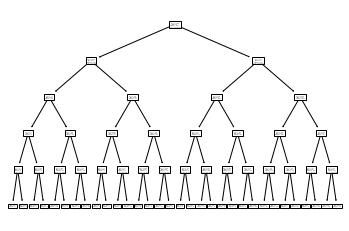

In [ ]:
tree.plot_tree(clf)